In [1]:
%load_ext autoreload
%autoreload 2
%tb

No traceback available to show.


In [2]:
import networkx as nx
from graph2plan.dual.examples import kant_G1
from graph2plan.dcel.original import (
    create_embedding,
)
from graph2plan.fourtp.checks import draw_node_positioned_graph, check_interior_faces_are_triangles, check_is_triangulated_chordal, check_is_biconnected, check_is_valid_triangulated, check_is_4_connected, check_has_no_seperating_triangle
from copy import deepcopy
from graph2plan.dual.helpers import get_embedding_faces

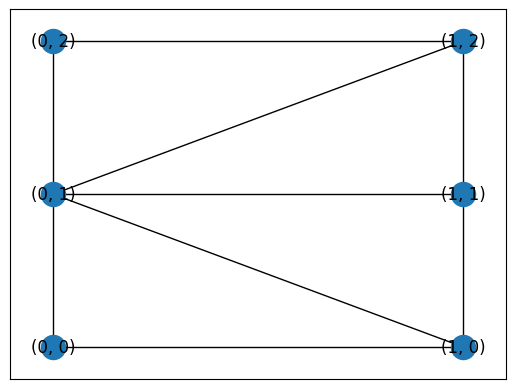

In [23]:
G, pos = draw_node_positioned_graph(nx.triangular_lattice_graph(2,2))

In [24]:
check_is_valid_triangulated(G, pos)

In [ ]:
embed = create_embedding(G, pos)


{Face(vertices=[(0, 0), (0, 1), (1, 0)]),
 Face(vertices=[(0, 0), (1, 0), (1, 1), (1, 2), (0, 2), (0, 1)]),
 Face(vertices=[(0, 1), (0, 2), (1, 2)]),
 Face(vertices=[(0, 1), (1, 2), (1, 1)]),
 Face(vertices=[(1, 0), (0, 1), (1, 1)])}

In [6]:
check_interior_faces_are_triangles(embed)

In [30]:
list(nx.k_edge_augmentation(G, 4))

[((0, 0), (2, 3)),
 ((0, 0), (2, 0)),
 ((0, 0), (0, 4)),
 ((0, 0), (2, 4)),
 ((0, 0), (2, 1)),
 ((0, 2), (0, 4))]

(<networkx.classes.graph.Graph at 0x10b6f2e00>,
 {(0, 0): (0, 0),
  (1, 0): (1, 0),
  (2, 0): (2, 0),
  (0, 1): (0, 1),
  (1, 1): (1, 1),
  (2, 1): (2, 1),
  (0, 2): (0, 2),
  (1, 2): (1, 2),
  (2, 2): (2, 2),
  (0, 3): (0, 3),
  (1, 3): (1, 3),
  (2, 3): (2, 3),
  (0, 4): (0, 4),
  (1, 4): (1, 4),
  (2, 4): (2, 4)})

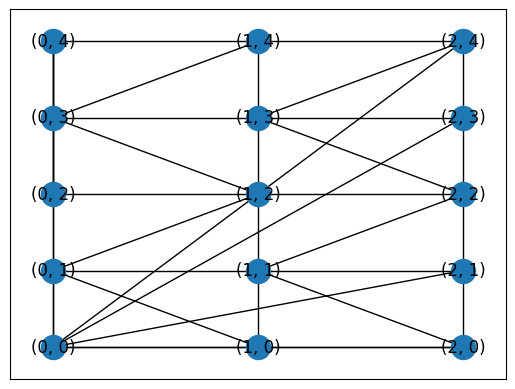

In [ ]:
# draw_node_positioned_graph(G1)

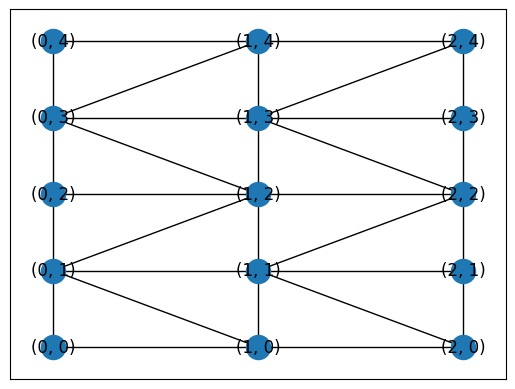

In [11]:
G, pos = draw_node_positioned_graph(nx.triangular_lattice_graph(4,4))

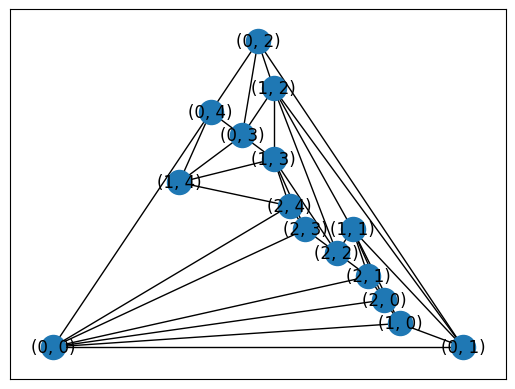

In [13]:

G1 = deepcopy(G)
G1.add_edges_from(nx.k_edge_augmentation(G, 4))

pos_planar = nx.planar_layout(G1)
nx.draw_networkx(G1, pos_planar)

In [15]:
embed = create_embedding(G1,pos_planar)
embed

In [16]:
check_interior_faces_are_triangles(embed)

Exception: Not all interior faces are triangular! Non-triangular faces: {Face(vertices=[(0, 0), (2, 3), (2, 2), (2, 1)]), Face(vertices=[(0, 0), (0, 4), (1, 4), (2, 4)])}

In [44]:
check_is_valid_triangulated(G)

Triangulated, but not chordal.. 


In [43]:
check_is_4_connected(G1)

In [27]:
nx.degree(G)

DegreeView({(0, 0): 2, (1, 0): 4, (2, 0): 3, (0, 1): 5, (1, 1): 6, (2, 1): 3, (0, 2): 3, (1, 2): 6, (2, 2): 5, (0, 3): 5, (1, 3): 6, (2, 3): 3, (0, 4): 2, (1, 4): 4, (2, 4): 3})

In [ ]:
degrees = list(nx.degree(G))
for deg in degrees:
    if deg[1] < 4:
        raise Exception(f"Node has less than 4 neighbors: {deg}")

((0, 0), 2)


Exception: Node has less than 4 neighbors: ((0, 0), 2)

In [11]:
check_is_valid_triangulated(G)
# check_is_4_connected(G)

In [10]:
check_has_no_seperating_triangle(G)

In [ ]:
check_is_biconnected(G)
check_interior_faces_are_triangles(G)
check_is_triangulated_chordal(G)

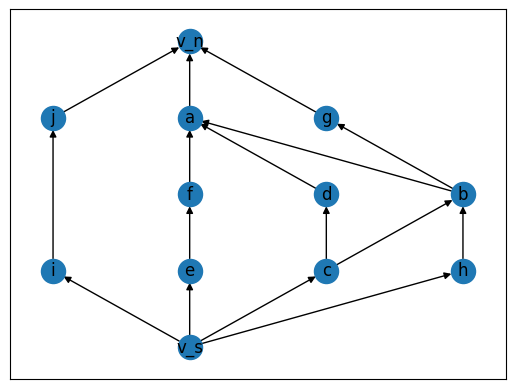

In [18]:
G, pos = kant_G1()
nx.draw_networkx(G,pos)

In [ ]:
check_is_biconnected(G.to_undirected())
check_interior_faces_are_triangles(G.to_undirected())
check_is_triangulated_chordal(G.to_undirected())

NotTriangulatedError: 